## **TRABAJO MINERÍA DE DATOS PYTHON**
##UNIVERSIDAD SANTO TOMÁS
##Facultad de estadística
##Estudiantes:

* Tatiana Chavez Perez
* Laura Jimena Tinjacá Lara

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt


La base de datos escogida para el siguiente trabajo es proveniente de Data Icfes, la plataforma oficial del ICFES cuya información es libre de uso. <BR>
Se observan los resultados del Pre-ICFES para los colegios en Colombia para el año 2018, reportando las siguientes variables:
* Puesto: El puesto que obtuvo cada colegio medido a través del promedio general obtenido.
* Colegio: El nombre del colegio.
* Departamento: Departamento de Colombia al cual pertenece el colegio.
* Municipio: Municipio del departamento al que pertenece el colegio.
* Oficial: Si el colegio es oficial o público, o por el contrario, no es oficial o privado.
* Periodo: Es el periodo académico en el que presentó las pruebas.
* Jornada: Jornada en la que se llevan a cabo las actividades escolares, puede ser en la mañana, tarde, noche, solo fines de semana (sábados y domingos) o jornada completa.
*  Calendario: El calendario académico al cual pertenece el colegio, puede ser calendario A, calendario B o calendario F (no trabaja en horarios definidos por lo que los alumnos se pueden graduar en cualquier momento del año siempre y cuando cumplan todos los requisitos).
* Número de evaluados: Cantidad de estudiantes que presentaron la prueba por cada colegio.
* Promedio general: Es el promedio general obtenido por cada colegio teniendo en cuenta todas las categorías evaluadas.
* Variables: Se observan 8 diferentes variables que miden diferentes campos educativos: Matemáticas, química, física, biología, filosofía, inglés, lenguaje y sociales. Para cada uno se tiene el promedio que se obtuvo para cada colegio. 
* Variables DE: Las variables DE son los índices para cada campo educativo mencionado anteriormente. Este índice no se tendrá en cuenta en el análisis ya que sólo funciona como una referencia para la obtención del promedio para cada variable.

In [108]:
datos=pd.read_excel('/content/drive/MyDrive/Base icfes.xlsx')
datos.head()

Puesto                          Colegio      Municipio Departamento  \
0     1.0     COLEGIO LA QUINTA DEL PUENTE  Floridablanca    Santander   
1     2.0      COLEGIO BILINGUE DIANA OESE           Cali        Valle   
2     3.0       GIMNASIO COLOMBO BRITANICO    Bogotá D.C.       Bogotá   
3     4.0   COLEGIO SANTA FRANCISCA ROMANA    Bogotá D.C.       Bogotá   
4     5.0  COLEGIO SAN JORGE DE INGLATERRA    Bogotá D.C.       Bogotá   

  Oficial  Periodo Jornada Calendario  Evaluados  Promedio General  ...  \
0      NO      1.0       C          B       31.0             70.08  ...   
1      NO      1.0       C          B       11.0             68.98  ...   
2      NO      2.0       C          A       73.0             67.95  ...   
3      NO      1.0       C          B       57.0             66.87  ...   
4      NO      1.0       C          B       58.0             66.66  ...   

   Lenguaje  Sociales  DE-Matemáticas  DE-Química  DE-Física  DE-Biología  \
0     63.32     64.68           17.35       10.56      10.36         6.53   
1     58.96     58.91           16.34        8.70      16.14        12.54   
2     74.29     66.71           11.25        9.83       9.57         7.12   
3     61.91     62.22           13.88        8.82       7.39         5.58   
4     63.47     64.57           12.95        6.90       8.34         7.17   

   DE-Filosofía  DE-Inglés  DE-Lenguaje  DE-Sociales  
0          6.13       7.37         5.82         8.29  
1          6.93       5.07         5.77         7.04  
2         11.15       7.81         9.17         9.34  
3          5.60       5.89         6.26         4.94  
4          6.08       7.49         6.59         5.43  

[5 rows x 26 columns]

In [109]:
print('BASE ICFES')
print('Número de observaciones :', datos.shape[0])
print('Número de variables: ', datos.shape[1])

BASE ICFES
Número de observaciones : 12273
Número de variables:  26


La base de datos contiene información de 12.273 colegios a los que se les midió un total de 26 variables. <BR>

  # Preprocesamiento de los datos

In [141]:
datos.dtypes

Puesto              float64
Colegio              object
Municipio            object
Departamento         object
Oficial              object
Periodo             float64
Jornada              object
Calendario           object
Evaluados           float64
Promedio General    float64
Matemáticas         float64
Química             float64
Física              float64
Biología            float64
Filosofía           float64
Inglés              float64
Lenguaje            float64
Sociales            float64
DE-Matemáticas      float64
DE-Química          float64
DE-Física           float64
DE-Biología         float64
DE-Filosofía        float64
DE-Inglés           float64
DE-Lenguaje         float64
DE-Sociales         float64
dtype: object

Se transforma la variable Periodo en una variable cualitativa

In [142]:
datos['Periodo']=datos['Periodo'].astype('str')

In [143]:
datos.dtypes

Puesto              float64
Colegio              object
Municipio            object
Departamento         object
Oficial              object
Periodo              object
Jornada              object
Calendario           object
Evaluados           float64
Promedio General    float64
Matemáticas         float64
Química             float64
Física              float64
Biología            float64
Filosofía           float64
Inglés              float64
Lenguaje            float64
Sociales            float64
DE-Matemáticas      float64
DE-Química          float64
DE-Física           float64
DE-Biología         float64
DE-Filosofía        float64
DE-Inglés           float64
DE-Lenguaje         float64
DE-Sociales         float64
dtype: object

In [144]:
datos_faltantes = pd.DataFrame()
datos_faltantes['Variable'] = list(datos.columns)
datos_faltantes['Número de datos faltantes'] = list(datos.isnull().sum())
datos_faltantes['Porcentaje de datos faltantes'] =  list((datos.isnull().sum() / datos.shape[0])*100) 
datos_faltantes

Variable  Número de datos faltantes  Porcentaje de datos faltantes
0             Puesto                          0                       0.000000
1            Colegio                          0                       0.000000
2          Municipio                          0                       0.000000
3       Departamento                          0                       0.000000
4            Oficial                          0                       0.000000
5            Periodo                          0                       0.000000
6            Jornada                          0                       0.000000
7         Calendario                          0                       0.000000
8          Evaluados                          0                       0.000000
9   Promedio General                          0                       0.000000
10       Matemáticas                          0                       0.000000
11           Química                          0                       0.000000
12            Física                          0                       0.000000
13          Biología                          0                       0.000000
14         Filosofía                          0                       0.000000
15            Inglés                          1                       0.008148
16          Lenguaje                          0                       0.000000
17          Sociales                          0                       0.000000
18    DE-Matemáticas                          0                       0.000000
19        DE-Química                          0                       0.000000
20         DE-Física                          0                       0.000000
21       DE-Biología                          0                       0.000000
22      DE-Filosofía                          0                       0.000000
23         DE-Inglés                          1                       0.008148
24       DE-Lenguaje                          0                       0.000000
25       DE-Sociales                          0                       0.000000

In [145]:
datos[datos["Inglés"].isnull() == True]

Puesto                                            Colegio  \
12205  12206.0  CENTRO DE EDUCACION Y REHABILITACION DE LA AUD...   

          Municipio Departamento Oficial Periodo Jornada Calendario  \
12205  Barranquilla    Atlántico      NO     2.0      Mñ          A   

       Evaluados  Promedio General  ...  Lenguaje  Sociales  DE-Matemáticas  \
12205       21.0             34.27  ...     35.57     40.29            6.93   

       DE-Química  DE-Física  DE-Biología  DE-Filosofía  DE-Inglés  \
12205       11.04       8.55        11.67          12.6        NaN   

       DE-Lenguaje  DE-Sociales  
12205        11.79         8.02  

[1 rows x 26 columns]

In [146]:
datos[datos["DE-Inglés"].isnull() == True]

Puesto                                            Colegio  \
12205  12206.0  CENTRO DE EDUCACION Y REHABILITACION DE LA AUD...   

          Municipio Departamento Oficial Periodo Jornada Calendario  \
12205  Barranquilla    Atlántico      NO     2.0      Mñ          A   

       Evaluados  Promedio General  ...  Lenguaje  Sociales  DE-Matemáticas  \
12205       21.0             34.27  ...     35.57     40.29            6.93   

       DE-Química  DE-Física  DE-Biología  DE-Filosofía  DE-Inglés  \
12205       11.04       8.55        11.67          12.6        NaN   

       DE-Lenguaje  DE-Sociales  
12205        11.79         8.02  

[1 rows x 26 columns]

In [147]:
datos.isnull().sum()

Puesto              0
Colegio             0
Municipio           0
Departamento        0
Oficial             0
Periodo             0
Jornada             0
Calendario          0
Evaluados           0
Promedio General    0
Matemáticas         0
Química             0
Física              0
Biología            0
Filosofía           0
Inglés              1
Lenguaje            0
Sociales            0
DE-Matemáticas      0
DE-Química          0
DE-Física           0
DE-Biología         0
DE-Filosofía        0
DE-Inglés           1
DE-Lenguaje         0
DE-Sociales         0
dtype: int64

Se puede observar que hay un dato faltante para el promedio de INGLÉS y un dato faltante para el índice DE-Inglés. Sin embargo, ya que ambas variables está asociada es decir que el índice DE-Inglés se obtiene medianto el promedio de INGLÉS, es decir que el dato faltante se encuentra para el mismo individuo. <BR> 
Para las demás variables no se obtienen datos faltantes por lo cuál se opta por eliminar la observación 12205 con el dato faltante encontrado.



In [148]:
datos=datos.drop(datos.index[[12205]])


In [149]:
print('Número de individuos :', datos.shape[0])
print('Número de variables: ', datos.shape[1])

Número de individuos : 12272
Número de variables:  26


In [150]:
datos[datos["Inglés"].isnull() == True]

Empty DataFrame
Columns: [Puesto, Colegio, Municipio, Departamento, Oficial, Periodo, Jornada, Calendario, Evaluados, Promedio General, Matemáticas, Química, Física, Biología, Filosofía, Inglés, Lenguaje, Sociales, DE-Matemáticas, DE-Química, DE-Física, DE-Biología, DE-Filosofía, DE-Inglés, DE-Lenguaje, DE-Sociales]
Index: []

[0 rows x 26 columns]

In [151]:
datos[datos["DE-Inglés"].isnull() == True]

Empty DataFrame
Columns: [Puesto, Colegio, Municipio, Departamento, Oficial, Periodo, Jornada, Calendario, Evaluados, Promedio General, Matemáticas, Química, Física, Biología, Filosofía, Inglés, Lenguaje, Sociales, DE-Matemáticas, DE-Química, DE-Física, DE-Biología, DE-Filosofía, DE-Inglés, DE-Lenguaje, DE-Sociales]
Index: []

[0 rows x 26 columns]

Datos duplicados

In [152]:
datos.duplicated().sum()

0

No se encontraron datos duplicados.

**Consistencia de los datos** 

- Variables cuantitativas

In [153]:
datos.describe()

Puesto     Evaluados  Promedio General   Matemáticas  \
count  12272.000000  12272.000000      12272.000000  12272.000000   
mean    6136.505460     46.583523         43.452143     44.792289   
std     3542.774992     45.365483          4.842894      6.949680   
min        1.000000      1.000000         23.310000     13.500000   
25%     3068.750000     17.000000         40.220000     40.090000   
50%     6136.500000     33.000000         42.820000     44.315000   
75%     9204.250000     62.000000         45.700000     48.520000   
max    12273.000000   1037.000000         70.080000     96.590000   

            Química        Física      Biología     Filosofía        Inglés  \
count  12272.000000  12272.000000  12272.000000  12272.000000  12272.000000   
mean      44.250803     43.701918     44.491418     39.028722     42.706333   
std        3.950031      4.288664      4.781148      5.756981      6.034090   
min       14.000000     13.000000     16.500000      8.000000      0.000000   
25%       41.750000     41.000000     41.330000     35.160000     39.880000   
50%       44.000000     43.300000     44.110000     38.810000     41.240000   
75%       46.210000     45.782500     47.090000     42.630000     43.250000   
max       74.000000     73.460000     69.500000     65.000000     87.970000   

           Lenguaje      Sociales  DE-Matemáticas    DE-Química     DE-Física  \
count  12272.000000  12272.000000    12272.000000  12272.000000  12272.000000   
mean      45.057474     43.582579        9.798851      6.892526      8.554339   
std        5.854294      5.164330        2.085530      1.634811      1.880216   
min       15.000000     18.500000        0.000000      0.000000      0.000000   
25%       41.137500     40.130000        8.780000      6.050000      7.600000   
50%       44.950000     42.880000        9.840000      6.830000      8.560000   
75%       48.510000     46.130000       10.880000      7.640000      9.500000   
max       74.290000     74.410000       31.570000     23.040000     27.580000   

        DE-Biología  DE-Filosofía     DE-Inglés   DE-Lenguaje   DE-Sociales  
count  12272.000000  12272.000000  12272.000000  12272.000000  12272.000000  
mean       8.641405     10.419605      6.637999      9.227383      8.509174  
std        2.042865      2.348868      2.109737      2.119176      1.794642  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        7.610000      9.227500      5.470000      8.210000      7.600000  
50%        8.660000     10.560000      6.300000      9.350000      8.570000  
75%        9.660000     11.730000      7.420000     10.380000      9.500000  
max       38.890000     28.280000     29.010000     28.990000     28.020000

De acuerdo a la consistencia de las variables cuantitativas que tiene la base de datos del ICFES se tiene que ninguna de estas variables presenta alguna inconsistencia ya que el promedio de las materias se encuentran en un intervalo de 0 a 100 y teniendo en cuenta que los índices de cada materia se obtiene mediante el promedio de la materia correspondiente y dado que estas son consistentes, los índices de igual manera son consistentes.

- Variables cualitativas.

In [154]:
cole = pd.DataFrame(datos['Colegio'].value_counts())
cole

Colegio
INSTITUTO CORFERRINI                                     37
INSTITUTO TECNICO PARA EL DESARROLLO RURAL IDEAR         29
INSTITUCION EDUCATIVA SAN JOSE                           22
INSTITUTO AGRICOLA                                       22
INSTITUTO REGIONAL DE EDUCACION RURAL  - IRER            20
...                                                     ...
INSTITUCION EDUCATIVA ELEAZAR LIBREROS                    1
INSTITUCION EDUCATIVA DISTRITAL CLEMENCIA HOLGU...        1
COLEGIO MARIA DEL SOCORRO                                 1
INSTITUCION EDUCATIVA ROMAN MARIA VALENCIA                1
INSTITUCION EDUCATIVA LOS ALAMOS                          1

[8886 rows x 1 columns]

In [155]:
cole.iloc[0:60]

Colegio
INSTITUTO CORFERRINI                                     37
INSTITUTO TECNICO PARA EL DESARROLLO RURAL IDEAR         29
INSTITUCION EDUCATIVA SAN JOSE                           22
INSTITUTO AGRICOLA                                       22
INSTITUTO REGIONAL DE EDUCACION RURAL  - IRER            20
INSTITUCION EDUCATIVA SIMON BOLIVAR                      19
COLEGIO DE LA PRESENTACION                               19
CIBERCOLEGIO UCN                                         17
INSTITUCION EDUCATIVA MARIA AUXILIADORA                  17
INSTITUCION EDUCATIVA NUESTRA SEÑORA DEL CARMEN          16
CONCENTRACION DE DESARROLLO RURAL                        16
INSTITUCION EDUCATIVA ANTONIO NARIÑO                     15
COLEGIO BOSTON                                           15
INSTITUCION EDUCATIVA JORGE ELIECER GAITAN               14
COLEGIO SAN JOSE                                         14
INSTITUCION EDUCATIVA SAGRADO CORAZON DE JESUS           14
COLEGIO NUESTRA SEÑORA DE FATIMA                         14
INSTITUCION EDUCATIVA LUIS CARLOS GALAN SARMIENTO        13
INSTITUTO REGIONAL DE EDUCACION RURAL - IRER             13
COLEGIO MARIA AUXILIADORA                                13
INSTITUCION EDUCATIVA SAN FRANCISCO DE ASIS              13
INSTITUCION EDUCATIVA JOSE ANTONIO GALAN                 13
INSTITUTO FERRINI                                        13
COLEGIO SANTA TERESITA                                   13
COLEGIO FRANCISCO JOSE DE CALDAS                         13
COLEGIO NUESTRA SEÑORA DEL ROSARIO                       12
COLEGIO LUIS CARLOS GALAN SARMIENTO                      12
INSTITUCION EDUCATIVA SANTA ROSA DE LIMA                 12
ESCUELA NORMAL SUPERIOR                                  12
INSTITUCION EDUCATIVA MARCO FIDEL SUAREZ                 11
INSTITUCION EDUCATIVA NUESTRA SEÑORA DEL ROSARIO         11
INSTITUTO TÉCNICO AGROINDUSTRIAL DE EDUCACIÓN C...       11
INSTITUTO TECNICO INDUSTRIAL                             10
COLEGIO SAGRADO CORAZON DE JESUS                         10
INSTITUCION EDUCATIVA POLICARPA SALAVARRIETA             10
COLEGIO JORGE ISAACS                                     10
INSTITUCION EDUCATIVA RAFAEL URIBE URIBE                 10
INSTITUTO POLITECNICO JOSE CELESTINO MUTIS               10
INSTITUCION EDUCATIVA GENERAL SANTANDER                  10
INSTITUCION EDUCATIVA SAN JUAN BOSCO                     10
INSTITUCION EDUCATIVA SANTA TERESITA                     10
COLEGIO LOS ANDES                                        10
INSTITUCION EDUCATIVA JOSE MARIA CORDOBA                 10
INSTITUCION EDUCATIVA SAN ISIDRO                          9
INSTITUTO NACIONAL DE PROMOCION SOCIAL                    9
COLEGIO JOSE ANTONIO GALAN                                9
INSTITUCION EDUCATIVA LA PAZ                              9
INSTITUCION EDUCATIVA FRANCISCO DE PAULA SANTANDER        9
INSTITUTO SAN FERNANDO FERRINI                            9
INSTITUCION EDUCATIVA ALFONSO LOPEZ PUMAREJO              9
INSTITUCION EDUCATIVA CRISTOBAL COLON                     9
COLEGIO ANTONIO NARIÑO                                    9
INSTITUTO DE EXCELENCIA HUMANA Y ACADEMICA IDEHA          9
INSTITUCION EDUCATIVA GABRIEL GARCIA MARQUEZ              9
COLEGIO LA INMACULADA                                     9
INSTITUCION EDUCATIVA CAMILO TORRES                       9
INSTITUCION EDUCATIVA GABRIELA MISTRAL                    8
INSTITUCION EDUCATIVA LICEO VICENTE CAVIEDES              8
COLEGIO SAN FRANCISCO DE ASIS                             8
INSTITUCION EDUCATIVA LA INMACULADA                       8

In [156]:
cole.iloc[61:120]

Colegio
COLEGIO COLOMBO BRITANICO                                 8
INSTITUTO ARQUIDIOCESANO URBANO Y RURAL IAUR              8
INSTITUCION EDUCATIVA MARIA INMACULADA                    8
COLEGIO TRIANGULO                                         8
COLEGIO COLOMBIANO DE BACHILLERATO                        8
COLEGIO NUESTRA SEÑORA DEL CARMEN                         8
INSTITUTO DE EDUCACION COMFENALCO CONSUELO MONT...        8
COLEGIO LA SALLE                                          7
COLEGIO DE LA SAGRADA FAMILIA                             7
COLEGIO BOLIVARIANO                                       7
INSTITUCION EDUCATIVA PIO XII                             7
INSTITUCION EDUCATIVA SAN MATEO                           7
INSTITUCION EDUCATIVA MANUELA BELTRAN                     7
INSTITUCION EDUCATIVA JUAN XXIII                          7
COLEGIO DEPARTAMENTAL NACIONALIZADO                       7
LICEO MODERNO                                             7
COLEGIO AMERICANO                                         7
INSTITUCION EDUCATIVA ENRIQUE OLAYA HERRERA               7
INSTITUCION EDUCATIVA SAN PEDRO CLAVER                    7
INSTITUTO TECNICO AGROPECUARIO                            7
INSTITUCION EDUCATIVA ANTONIA SANTOS                      7
INSTITUCION EDUCATIVA LAS AMERICAS                        6
INSTITUCION EDUCATIVA ANTONIO RICAURTE                    6
CENTRO PANAMERICANO DE CAPACITACION                       6
INSTITUCION EDUCATIVA JOHN F. KENNEDY                     6
COLEGIO SAN LUIS GONZAGA                                  6
INSTITUCION EDUCATIVA SANTA LUCIA                         6
INSTITUTO INGABO                                          6
INSTITUCION EDUCATIVA RAFAEL NUÑEZ                        6
CENTRO JOHANN KEPLER                                      6
INSTITUCION EDUCATIVA LA LIBERTAD                         6
INSTITUCION EDUCATIVA SAN RAFAEL                          6
POLITECNICO UNIVERSAL DE CAPACITACION UNICAP              6
INSTITUCION EDUCATIVA DISTRITAL SIMON BOLIVAR             6
COLEGIO MARIA MONTESSORI                                  6
CENTRO EDUCATIVO SURAMERICANO                             6
INSTITUTO SER INTERNACIONAL                               6
COLEGIO EL ROSARIO                                        6
COLEGIO JUAN XXIII                                        6
INSTITUCION EDUCATIVA MARIA REINA                         6
COLEGIO CRISTO REY                                        6
COLEGIO SIMON BOLIVAR                                     6
COLEGIO MANUEL ELKIN PATARROYO                            6
CORPORACION EDUCATIVA ARKOS U                             6
COLEGIO SAN LUIS                                          6
INSTITUCION EDUCATIVA SANTANDER                           6
INSTITUCION EDUCATIVA SAN ANTONIO                         6
COLEGIO CENTRO DE INSTRUCCION SISTEMATIZADA CEIS          6
COLEGIO RAFAEL POMBO                                      5
COLEGIO NUESTRA SEÑORA DEL PILAR                          5
COLEGIO JUAN PABLO II                                     5
INSTITUTO WINDSOR                                         5
INSTITUCION EDUCATIVA LEON XIII                           5
INSTITUCION EDUCATIVA NORMAL SUPERIOR                     5
INSTITUCION EDUCATIVA BOYACA                              5
INSTITUTO TECNICO NACIONAL DE COMERCIO                    5
COLEGIO LATINO                                            5
INSTITUCION EDUCATIVA LA UNION                            5
INSTITUCION EDUCATIVA NACIONAL                            5

In [157]:
cole.iloc[121:180]

Colegio
COLEGIO MARIA INMACULADA                                  5
INSTITUTO TECNICO AGRICOLA                                5
INSTITUCION EDUCATIVA SAN PEDRO                           5
COLEGIO DEL SAGRADO CORAZON DE JESUS                      5
ATENEO AUTONOMO DE COLOMBIA                               5
COLEGIO JORGE ELIECER GAITAN                              5
COLEGIO DEPARTAMENTAL DE BACHILLERATO                     5
INSTITUCION EDUCATIVA SANTA TERESA                        5
INSTITUCIÓN EDUCATIVA EL PORTICO                          5
INSTITUTO CALIMA                                          5
COLEGIO CALASANZ                                          5
INSTITUCION EDUCATIVA JUAN PABLO II                       5
COLEGIO COMERCIAL MIXTO INCANOF                           5
INSTITUCION EDUCATIVA SANTA BARBARA                       5
COLEGIO PRINCIPE SAN CARLOS                               5
COLEGIO RAFAEL URIBE URIBE                                5
CENTROS DE DESARROLLO INTEGRADO CENDI                     5
COLEGIO CORPORACION SANTO DOMINGO                         5
INSTITUCION EDUCATIVA LAS DELICIAS                        5
INSTITUCION EDUCATIVA LAS MERCEDES                        5
COLEGIO NUESTRA SEÑORA DE LAS MERCEDES                    5
COLEGIO MARCO FIDEL SUAREZ                                5
COLEGIO DEPARTAMENTAL INTEGRADO                           5
INSTITUCION EDUCATIVA MISAEL PASTRANA BORRERO             5
INSTITUCION EDUCATIVA ATANASIO GIRARDOT                   5
COLEGIO INSCAP                                            5
CORPORACION TECNICA CEDEFOC                               5
INSTITUCION EDUCATIVA SAGRADO CORAZON                     5
INSTITUCION EDUCATIVA DISTRITAL LA MERCED                 4
INSTITUCION EDUCATIVA SAGRADA FAMILIA                     4
INSTITUCION EDUCATIVA SAN MARCOS                          4
CENTRO DE FORMACION EDUCATIVA CENFE                       4
ESCUELA NORMAL NACIONAL                                   4
COLEGIO CHAMPAGNAT                                        4
COLEGIO VIDA Y PAZ                                        4
INSTITUTO LA CAMPIÑA                                      4
COLEGIO FONTAN                                            4
INSTITUTO KENNEDY                                         4
FUNDACION EDUCATIVA CENSA JUAN SEBASTIAN GUTIER...        4
COLEGIO HARVARD                                           4
CENTRO DE ESTUDIOS HUITAKA                                4
COLEGIO CARLOS LLERAS RESTREPO                            4
INSTITUCION EDUCATIVA SANTO DOMINGO SAVIO                 4
COLEGIO PEDAGOGICO DE COLOMBIA                            4
INSTITUCION EDUCATIVA DISTRITAL CEDID SAN PABLO           4
INSTITUTO STUDIUM                                         4
INSTITUCION EDUCATIVA SAN LUIS                            4
GIMNASIO UNION NACIONAL                                   4
COLEGIO ASED                                              4
COLEGIO JUAN JOSE RONDON                                  4
CENTRO DE ESTUDIOS SAN BASILIO                            4
INSTITUCION EDUCATIVA CASILDA ZAFRA                       4
INSTITUCION EDUCATIVA NUESTRA SEÑORA DE LAS MER...        4
INSTITUCION EDUCATIVA DEL VALLE                           4
INSTITUCION EDUCATIVA DISTRITAL FRANCISCO DE PA...        4
INSTITUCION EDUCATIVA SAN MIGUEL                          4
INSTITUTO DE PROMOCION SOCIAL                             4
COLEGIO PAULO FREIRE                                      4
INSTITUCION EDUCATIVA EL CARMEN                           4

In [158]:
cole.iloc[181:240]

Colegio
COLEGIO MUNICIPAL GUILLERMO NIÑO MEDINA                   4
LICEO DEL CARIBE                                          4
INSTITUCION EDUCATIVA NUESTRA SEÑORA DE FATIMA            4
LICEO JOSE FELIX JIMENEZ                                  4
INSTITUCION EDUCATIVA DIVINO NIÑO                         4
NUEVO INSTITUTO DE APRENDIZAJE SURCOLOMBIANO              4
COLEGIO PABLO VI                                          4
COLEGIO EL CARMELO                                        4
INSTITUCION EDUCATIVA CARLOTA SANCHEZ                     4
INSTITUCION EDUCATIVA FRANCISCO MIRANDA                   4
COLEGIO JOSE ACEVEDO Y GOMEZ                              4
COLEGIO EL DIVINO NIÑO                                    4
COLEGIO PANAMERICANO                                      4
INSTITUCION EDUCATIVA LA FLORESTA                         4
CASA ACADEMICA CULTURAL                                   4
CENTRO DE CAPACITACION BOLIVAR CENCABO                    4
INSTITUTO INTEGRADO NACIONALIZADO JOAQUIN GONZA...        4
CENTRO EDUCATIVO DISTRITAL EL JAPON                       4
INSTITUCION EDUCATIVA PABLO VI                            4
INSTITUCION EDUCATIVA SANTO TOMAS DE AQUINO               4
INSTITUCION EDUCATIVA PABLO SEXTO                         4
INSTITUCION EDUCATIVA CARDENAS CENTRO                     4
INSTITUTO JOSE ANTONIO GALAN                              4
COLEGIO EMMANUEL RUBIANO                                  4
COLEGIO CENCOSISTEMAS                                     4
INSTITUTO DE CIENCIAS APLICADAS INDECAP                   4
INSTITUCION EDUCATIVA LA MILAGROSA                        4
INSTITUCION EDUCATIVA JOHN F KENNEDY                      4
INSTITUCION EDUCATIVA DISTRITAL RAFAEL URIBE URIBE        4
LICEO LEON DE GREIFF                                      4
COLEGIO NACIONAL MARCO FIDEL SUAREZ                       4
COLEGIO CAMILO TORRES RESTREPO                            4
COLEGIO NACIONALIZADO                                     4
LICEO SAN FERNANDO                                        4
INSTITUCION EDUCATIVA BUENOS AIRES                        4
COLEGIO DE BACHILLERATO FRANCISCO DE PAULA SANT...        4
GIMNASIO JUVENIL SANTA CATALINA                           4
INSTITUCION EDUCATIVA SAN JUAN BAUTISTA DE LA S...        4
INSTITUCION EDUCATIVA TECNICA AGROINDUSTRIAL DE...        4
COLEGIO JOSE ASUNCION SILVA                               4
COLEGIO SAN CARLOS                                        4
INSTITUCION EDUCATIVA EL SALVADOR                         4
INSTITUCION EDUCATIVA DISTRITAL CAMPESTRE MONTE...        4
INSTITUCION EDUCATIVA JUAN JOSE NIETO                     4
INSTITUCION EDUCATIVA DISTRITAL  RESTREPO MILLAN          4
COLEGIO ANGLO COLOMBIANO                                  4
COLEGIO LOS LIBERTADORES                                  4
INSTITUCION EDUCATIVA DEPARTAMENTAL ANTONIO NARIÑO        4
INSTITUCION EDUCATIVA ANTONIO ROLDAN BETANCUR             4
COLEGIO MUNICIPAL DE BACHILLERATO JESUS MARIA A...        4
COLEGIO NACIONAL UNIVERSITARIO                            4
COLEGIO ANDINO                                            4
INSTITUTO PESTALOZZI                                      4
INSTITUCION EDUCATIVA DE SANTA LIBRADA                    4
COLEGIO SAGRADOS CORAZONES                                4
COLEGIO MIGUEL ANTONIO CARO                               4
COLEGIO DOMINGO SAVIO                                     4
COLEGIO NUEVO MILENIO                                     4
COLEGIO DEPARTAMENTAL NACIONALIZADO SERREZUELA            4

In [159]:
cole.iloc[8760:8820]

Colegio
INSTITUCION EDUCATIVA AGROPECUARIA VILLALOBOS             1
COLEGIO FELIPE HENAO JARAMILLO                            1
COLEGIO DEPARTAMENTAL TECNICO AGROPECUARIO MART...        1
INSTITUTO EDUCATIVO EL LLANO                              1
COLEGIO COMPARTIR                                         1
CENTRO EDUCATIVO DISTRITAL HERNANDO DURAN DUSSAN          1
CED GIMNASIO SABIO CALDAS                                 1
UNIDAD EDUCATIVA CASTILLA LA NUEVA                        1
COLEGIO EMILIO SOTOMAYOR                                  1
COLEGIO DEPARTAMENTAL NACIONALIZADO ALFONSO LOP...        1
FUNDACION EDUCATIVA NUESTRA SEÑORA DE LAS FLORES          1
COLEGIO CAMPESTRE LA ESTRELLA                             1
CENTRO EDUCATIVO MIXTO DE GALAPA                          1
INSTITUTO TECNICO SALOMIA                                 1
LICEO MODERNO CIUDAD DE CALI                              1
INSTITUTO TECNICO OLGA SANTAMARIA                         1
COLEGIO TECNICO COMERCIAL E INDUSTRIAL DIVINO NIÑO        1
LICEO ROBERTO MAC. DOUALL                                 1
INSTITUCION EDUCATIVA REPUBLICA DE BARBADOS               1
INSTITUCION EDUCATIVA DISTRITAL ESTANISLAO ZULE...        1
COLEGIO TECNICO COMERCIAL DE JENESANO                     1
LICEO COMERCIAL AQUILINO BEDOYA                           1
LICEO CARMELITA ARCILA                                    1
INSTITUCION EDUCATIVA RURAL SANTA FE DEL CAGUAN           1
COLEGIO DEPARTAMENTAL NACIONALIZADO PIO XII               1
COMPLEJO EDUCATIVO LA JULITA                              1
COLEGIO ALMIRANTE COLON                                   1
COLEGIO DEPARTAMENTAL NACIONALIZADO DE CAQUEZA            1
INSTITUCION EDUCATIVA DISTRITAL SANTA BERNARDITA          1
COLEGIO DIOCESANO JUAN XXIII                              1
COLEGIO DEPARTAMENTAL INTEGRADO ANEXO LA DESPENSA         1
INSTITUCION EDUCATIVA TECNICA MAXIMILIANO NEIRA...        1
LICEO DON MATIAS                                          1
INSTITUCION EDUCATIVA JORGE VILLAMIL ORTEGA               1
COLEGIO MARCO FIDEL SUAREZ BACHILLERATO RURAL             1
COLEGIO INTEGRADO MARIA AUXILIADORA                       1
INSTITUTO HERBERT SPENCER LTDA                            1
INSTITUCION EDUCATIVA SOSIMO SUAREZ                       1
INSTITUCION EDUCATIVA COLEGIO BASICO MANUELA BE...        1
INSTITUCION EDUCATIVA SANTO DOMINGO VIDAL                 1
COLEGIO ALFONSO LOPEZ MICHELSEN I.E.D.                    1
INSTITUCION EDUCATIVA VICTORIA MANZUR                     1
INSTITUCION EDUCATIVA 20 DE ENERO                         1
COLEGIO ANDALUCIA                                         1
INSTITUCION  EDUCATIVA SANTA MARIA MAZZARELLO             1
INSTITUCION SIMON BOL,IVAR                                1
COLEGIO NACIONAL ENRIQUE OLAYA HERRERA                    1
COLEGIO CENTRO CULTURAL                                   1
INSTITUTO TECNOLOGICO                                     1
COLEGIO PRADO VERANIEGO SEDE I                            1
INSTITUCION EDUCATIVA FE Y ALEGRIA GRANIZAL               1
INSTITUTO AGRICOLA LA INDIA                               1
COLEGIO NACIONAL SANTA LIBRADA                            1
INSTITUCION EDUCATIVA AGROINDUSTRIAL FRANCISCO ...        1
INSTITUCION EDUCATIVA ESTAMBUL                            1
COLEGIO SERAFICO SAN ANTONIO DE PADUA                     1
INSTITUCION EDUCATIVA EL DIAMANTE                         1
LICEO DEPARTAMENTAL SAN LORENZO DE ABURRA                 1
COLEGIO NACIONALIZADO LISANDRO CELY                       1
INSTITUCION EDUCATIVA EUDORO GRANADA                      1

In [160]:
cole.iloc[8721:8886]

Colegio
LICEO CRISTIANO MANANTIAL DE VIDA                         1
INSTITUCION EDUCATIVA HERNAN VILLA                        1
COLEGIO INTEGRADO CAJETE                                  1
ESCUELA NORMAL SUPERIOR SAGRADA FAMILIA                   1
BACHILLERATO SEMIPRESENCIAL Y A DISTANCIA                 1
...                                                     ...
INSTITUCION EDUCATIVA ELEAZAR LIBREROS                    1
INSTITUCION EDUCATIVA DISTRITAL CLEMENCIA HOLGU...        1
COLEGIO MARIA DEL SOCORRO                                 1
INSTITUCION EDUCATIVA ROMAN MARIA VALENCIA                1
INSTITUCION EDUCATIVA LOS ALAMOS                          1

[165 rows x 1 columns]

In [161]:
dep = pd.DataFrame(datos['Departamento'].value_counts())
dep

Departamento
Bogotá                   1660
Antioquia                1446
Valle                    1149
Cundinamarca              916
Santander                 648
Atlántico                 624
Bolívar                   533
Boyacá                    501
Tolima                    430
Cauca                     422
Nariño                    403
Cordoba                   355
Huila                     341
Magdalena                 340
Norte Santander           323
Caldas                    288
Meta                      263
Cesar                     254
Sucre                     238
Risaralda                 231
Quindío                   149
La Guajira                147
Casanare                  126
Caquetá                   123
Choco                     117
Putumayo                   85
Arauca                     71
Guaviare                   25
San Andres                 18
Amazonas                   16
Vaupés                     13
Vichada                    11
Guainía                     6

In [162]:
muni = pd.DataFrame(datos['Municipio'].value_counts())
muni

Municipio
Bogotá D.C.            1660
Cali                    555
Barranquilla            385
Medellin                356
Cartagena               249
...                     ...
Barranca De Upia          1
Tibirita                  1
Sora                      1
Puerto Santander          1
Barranco Minas            1

[1070 rows x 1 columns]

In [163]:
muni.iloc[0:60]

Municipio
Bogotá D.C.                  1660
Cali                          555
Barranquilla                  385
Medellin                      356
Cartagena                     249
Bucaramanga                   150
Villavicencio                 148
Pereira                       135
Cucuta                        127
Santa Marta                   125
Soacha                        119
Medellín                      117
Ibague                        110
Soledad                       106
Valledupar                    102
Buenaventura                  102
Manizales                     100
Neiva                          92
Pasto                          92
Palmira                        86
Bello                          86
Armenia                        85
Monteria                       76
Popayan                        76
Sincelejo                      70
Floridablanca                  63
Chia                           53
Florencia                      53
Barrancabermeja                52
Tunja                          48
Yopal                          47
Maicao                         46
Sogamoso                       45
Tumaco                         45
Fusagasuga                     43
Cúcuta                         43
Rionegro                       42
Itagui                         42
Duitama                        39
Buga                           39
Turbo                          38
Envigado                       38
Ipiales                        37
Facatativa                     37
Tulua                          37
Santander De Quilichao         37
Riohacha                       36
Pitalito                       36
Dos Quebradas                  36
Cartago                        36
Piedecuesta                    36
Apartado                       34
Magangue                       33
Ibagué                         33
Jamundi                        33
Bolivar                        32
Zipaquira                      32
Girardot                       31
Yumbo                          30
Funza                          30

In [164]:
muni.iloc[1010:1070]

Municipio
La Jagua Del Pilar              1
Bituima                         1
Sativasur                       1
San Calixto                     1
Coloso (Ricaurte)               1
Pisva                           1
Tenza                           1
Oicata                          1
Herran                          1
California                      1
Yali                            1
Guayabetal                      1
Charta                          1
Hobo                            1
Venecia (Ospina Perez)          1
Guepsa                          1
Boyacá                          1
La Salina                       1
Purificación                    1
Altamira                        1
Chitaga                         1
Recetor                         1
Usiacuri                        1
Guacamayas                      1
Jardín                          1
Silos                           1
Santa Rosalia                   1
Ragonvalia                      1
Cuitiva                         1
Pachavita                       1
Cacota                          1
Paez                            1
Norcasia                        1
Pto Santander                   1
Sutatausa                       1
Chitaraque                      1
Paz De Rio                      1
Utica                           1
Nuqui                           1
Piamonte                        1
Paya                            1
Agua De Dios                    1
El Roble                        1
Belén De Los Andaquies          1
Jenesano                        1
Cravo Norte                     1
Colon (Génova)                  1
La Capilla                      1
Taraira                         1
Betania                         1
Ubaque                          1
San Eduardo                     1
Hacari                          1
Jerusalen                       1
Páez                            1
Barranca De Upia                1
Tibirita                        1
Sora                            1
Puerto Santander                1
Barranco Minas                  1

In [165]:
datos['Oficial'].value_counts()

SI      7904
NO      4363
n.d.       5
Name: Oficial, dtype: int64

In [166]:
datos[datos['Oficial']=='n.d.']

Puesto                                           Colegio  \
7717    7718.0  INSTITUTO TECNICO PARA EL DESARROLLO RURAL IDEAR   
8135    8136.0            INSTITUCION EDUCATIVA RURAL VANGUARDIA   
9597    9598.0         INSTITUCION EDUCATIVA RURAL MARIA GORETTI   
10826  10827.0  INSTITUTO TECNICO PARA EL DESARROLLO RURAL IDEAR   
11865  11866.0  INSTITUTO TECNICO PARA EL DESARROLLO RURAL IDEAR   

           Municipio Departamento Oficial Periodo Jornada Calendario  \
7717        Zapatoca    Santander    n.d.     2.0       C          A   
8135   Villavicencio         Meta    n.d.     2.0       N          F   
9597       Manizales       Caldas    n.d.     2.0     S-D          F   
10826        Cabrera    Santander    n.d.     2.0       C          A   
11865      Barichara    Santander    n.d.     2.0       C          A   

       Evaluados  Promedio General  ...  Lenguaje  Sociales  DE-Matemáticas  \
7717        20.0             41.53  ...     44.65     43.45            6.53   
8135        22.0             41.14  ...     45.68     44.59           11.43   
9597        49.0             39.83  ...     41.37     40.33            9.45   
10826        7.0             38.45  ...     32.71     37.71            6.68   
11865        8.0             36.38  ...     34.25     39.00            7.06   

       DE-Química  DE-Física  DE-Biología  DE-Filosofía  DE-Inglés  \
7717         7.68       8.05         9.16          9.34       5.48   
8135         6.70       7.72         5.93         10.94       7.24   
9597         6.48       9.28         7.13          9.81       5.17   
10826        6.26       4.30        10.25          5.97       7.87   
11865        5.63       8.49         8.72         10.73       7.33   

       DE-Lenguaje  DE-Sociales  
7717          8.03         6.06  
8135         10.31         8.68  
9597          8.18         8.81  
10826         9.43         5.88  
11865        10.08         8.90  

[5 rows x 26 columns]

Se deciden eliminar aquellos registros donde no se clasificó al colegio como si fuera o no un colegio oficial.

In [167]:
datos = datos.drop(datos.index[[7717,8135,9597,10826,11865]])


In [168]:
datos[datos['Oficial']=='n.d.']

Empty DataFrame
Columns: [Puesto, Colegio, Municipio, Departamento, Oficial, Periodo, Jornada, Calendario, Evaluados, Promedio General, Matemáticas, Química, Física, Biología, Filosofía, Inglés, Lenguaje, Sociales, DE-Matemáticas, DE-Química, DE-Física, DE-Biología, DE-Filosofía, DE-Inglés, DE-Lenguaje, DE-Sociales]
Index: []

[0 rows x 26 columns]

In [169]:
print('Así va la base...')
print('Filas :', datos.shape[0])
print('Columnas :', datos.shape[1])

Así va la base...
Filas : 12267
Columnas : 26


In [170]:
pd.DataFrame(datos['Periodo'].value_counts())

Periodo
2.0    11248
1.0     1019

In [171]:
pd.DataFrame(datos['Calendario'].value_counts())

Calendario
A        9809
F        2112
B         346

In [172]:
pd.DataFrame(datos['Jornada'].value_counts())

Jornada
Mñ      4644
C       3749
T       1585
N       1440
S-D      849

No se encontraron inconsistencia para las variables cualitativas, exceptuando por la variable Oficial que se refiere a que si el colegio es oficial o no, dado que en 5 registros no se identifico a que categoría pertenece el colegio, se optan por eliminar estos registros.

# 2

Dado el preprocesamiento de los datos se queda con una información total de  12262 colegios y 26 variables.

In [173]:
columns = ['Puesto','Departamento','Oficial','Periodo','Jornada','Calendario','Evaluados','Promedio General','Matemáticas','Química','Física','Biología',
           'Filosofía','Inglés','Lenguaje','Sociales']
datos2 = datos.copy()
datos2 = datos2[columns]
datos2

Puesto Departamento Oficial Periodo Jornada Calendario  Evaluados  \
0          1.0    Santander      NO     1.0       C          B       31.0   
1          2.0        Valle      NO     1.0       C          B       11.0   
2          3.0       Bogotá      NO     2.0       C          A       73.0   
3          4.0       Bogotá      NO     1.0       C          B       57.0   
4          5.0       Bogotá      NO     1.0       C          B       58.0   
...        ...          ...     ...     ...     ...        ...        ...   
12268  12269.0      Bolívar      SI     2.0     S-D          F        1.0   
12269  12270.0       Bogotá      NO     2.0       C          A       30.0   
12270  12271.0       Bogotá      NO     2.0      Mñ          A        8.0   
12271  12272.0        Valle      NO     2.0      Mñ          A        2.0   
12272  12273.0        Valle      NO     2.0     S-D          F        2.0   

       Promedio General  Matemáticas  Química  Física  Biología  Filosofía  \
0                 70.08        90.67    67.48   73.46     63.90      52.03   
1                 68.98        96.59    62.47   72.30     65.24      52.91   
2                 67.95        69.97    64.85   65.51     63.22      62.15   
3                 66.87        84.00    65.50   59.77     61.10      52.79   
4                 66.66        78.28    63.52   61.18     63.10      53.23   
...                 ...          ...      ...     ...       ...        ...   
12268             30.38        35.00    47.00   13.00     20.00      28.00   
12269             30.02        32.63    39.10   34.87     37.30      28.77   
12270             29.57        31.13    34.63   38.75     36.63      26.50   
12271             29.50        31.00    14.00   19.50     36.50      28.50   
12272             23.31        13.50    14.50   18.50     16.50      18.50   

       Inglés  Lenguaje  Sociales  
0       85.06     63.32     64.68  
1       84.45     58.96     58.91  
2       76.89     74.29     66.71  
3       87.68     61.91     62.22  
4       85.89     63.47     64.57  
...       ...       ...       ...  
12268   39.00     33.00     28.00  
12269    0.00     32.57     34.93  
12270    0.00     33.63     35.25  
12271   40.50     35.00     31.00  
12272   44.00     31.50     29.50  

[12267 rows x 16 columns]

No se tendrán en cuenta las siguientes variables: 
* Colegio: Puesto que se considera una etiqueta del individuo, lo cual no es de nuestro interés.
* Municipio: Hay demasiadas categorías para esta variable, además hay municipios que sólo tienen un colegio. No se considera relevante para el estudio y mejor se usará una variable más genérica como lo es el departamento.
* DE: Las variables DE no se tendrán en cuenta debido a que, como se mencionó al inicio, representan un índice de los resultados obtenidos por materia, información que no resulta relevante ya que se tienen los resultados por materia en otras variables.

In [174]:
print('Número de individuos :', datos2.shape[0])
print('Número de variables :', datos2.shape[1])

Número de individuos : 12267
Número de variables : 16


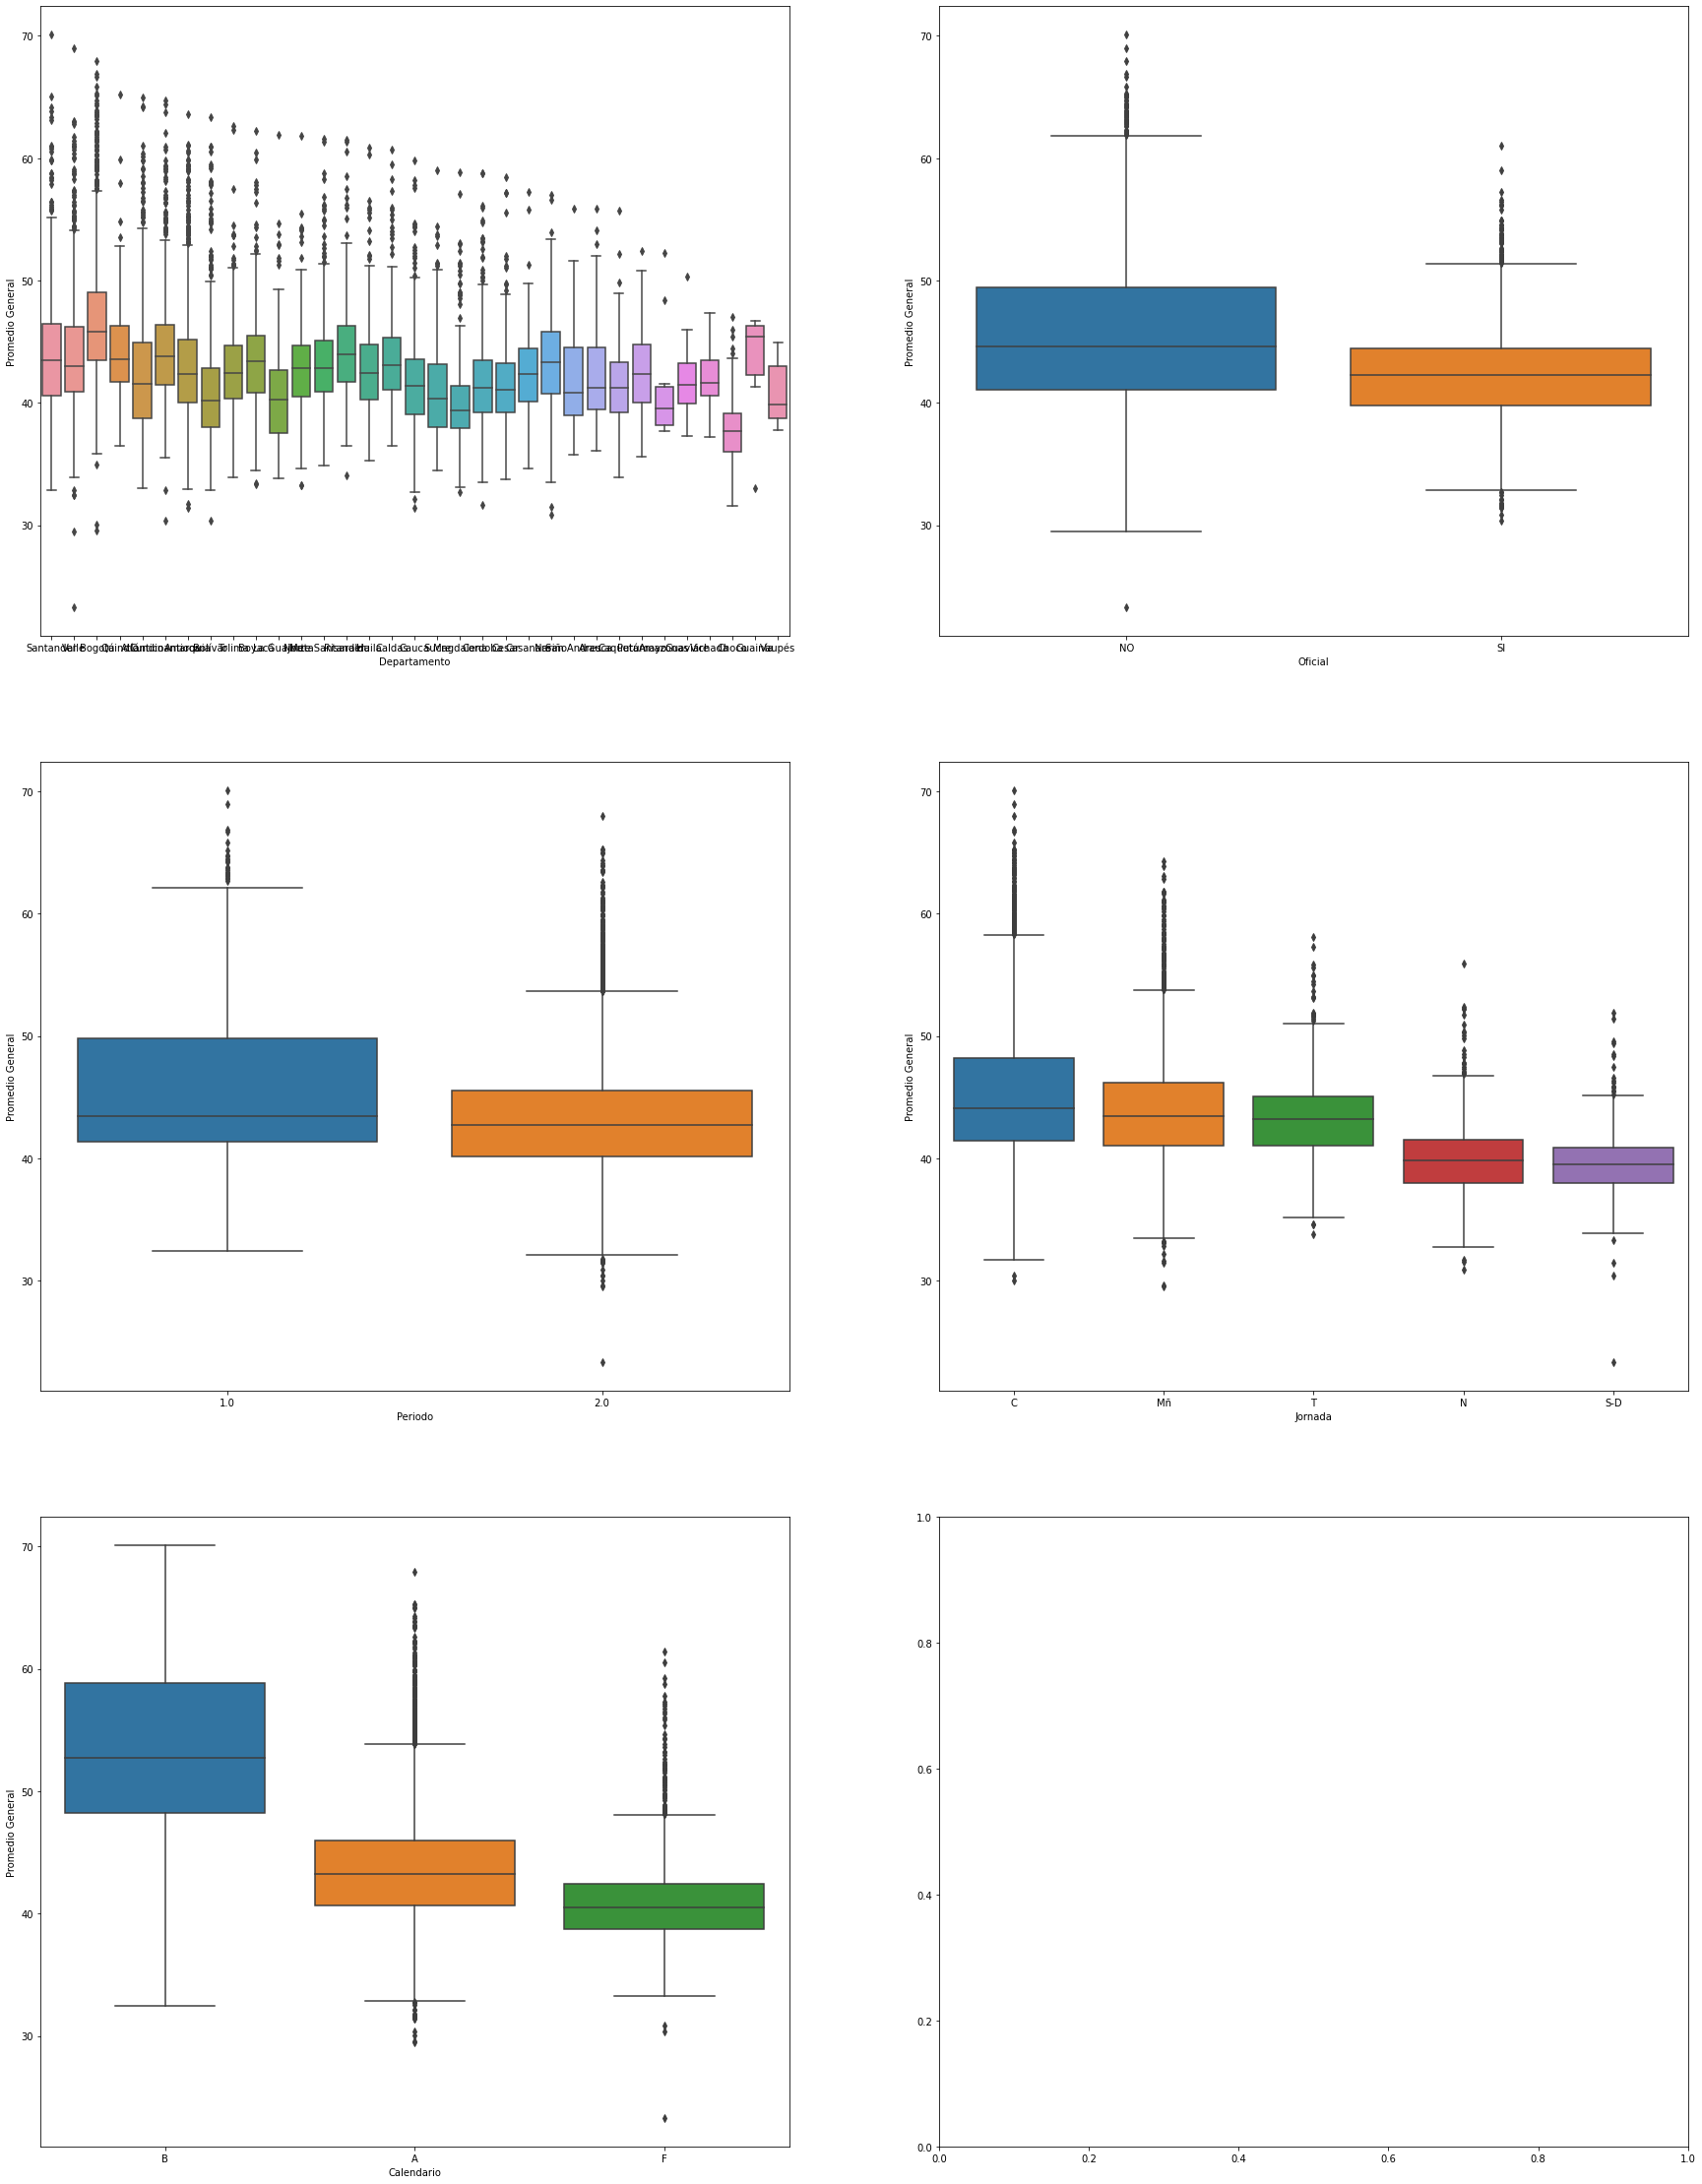

In [175]:
import seaborn
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(30, 40))
seaborn.boxplot(ax=axes[0, 0], data=datos2, x='Departamento',y='Promedio General')
seaborn.boxplot(ax=axes[0, 1], data=datos2, x='Oficial',y='Promedio General') 
seaborn.boxplot(ax=axes[1, 0], data=datos2, x='Periodo',y='Promedio General')
seaborn.boxplot(ax=axes[1, 1], data=datos2, x='Jornada',y='Promedio General') 
seaborn.boxplot(ax=axes[2, 0], data=datos2, x='Calendario',y='Promedio General')


In [176]:
import seaborn as sns
tab1 = np.corrcoef(datos2['Promedio General'],datos2['Puesto'])
ax = sns.heatmap(tab1,
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlOrRd") 

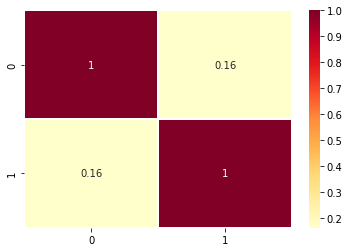

In [177]:
tab2 = np.corrcoef(datos2['Promedio General'],datos2['Evaluados'])
ax = sns.heatmap(tab2,
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlOrRd") 

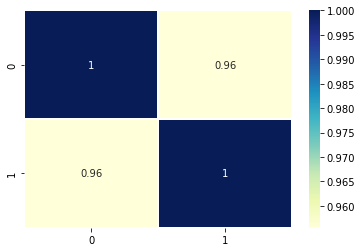

In [178]:
tab3 = np.corrcoef(datos2['Promedio General'],datos2['Matemáticas'])
ax = sns.heatmap(tab3,
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlGnBu")

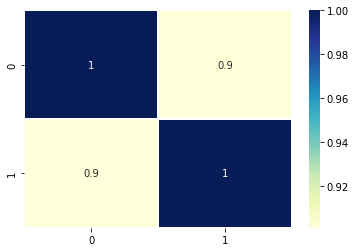

In [179]:
tab4 = np.corrcoef(datos2['Promedio General'],datos2['Química'])
ax = sns.heatmap(tab4,
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlGnBu")

In [180]:
tab5 = np.corrcoef(datos2['Promedio General'],datos2['Física'])
ax = sns.heatmap(tab5,
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlGnBu")

In [181]:
tab6 = np.corrcoef(datos2['Promedio General'],datos2['Biología'])
ax = sns.heatmap(tab6,
                 annot=True, 
                 linewidths=.5, 
                 cmap="RdPu")

In [182]:
tab7 = np.corrcoef(datos2['Promedio General'],datos2['Filosofía'])
ax = sns.heatmap(tab7,
                 annot=True, 
                 linewidths=.5, 
                 cmap="RdPu")

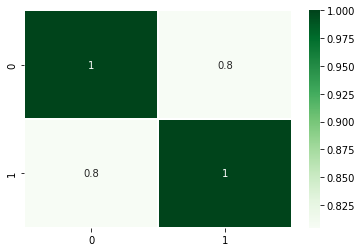

In [183]:
tab8 = np.corrcoef(datos2['Promedio General'],datos2['Inglés'])
ax = sns.heatmap(tab8,
                 annot=True, 
                 linewidths=.5, 
                 cmap="Greens")

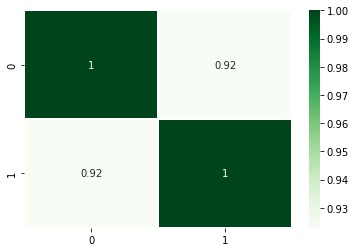

In [184]:
tab9 = np.corrcoef(datos2['Promedio General'],datos2['Lenguaje'])
ax = sns.heatmap(tab9,
                 annot=True, 
                 linewidths=.5, 
                 cmap="Greens")

In [185]:
tab10 = np.corrcoef(datos2['Promedio General'],datos2['Sociales'])
ax = sns.heatmap(tab10,
                 annot=True, 
                 linewidths=.5, 
                 cmap="Greens")

Ahora veremos la diferencia de medias por tratamiento con su respectiva prueba t.test, teniendo en cuenta las variables cualitativas:

1. Departamento:

In [186]:
datos2.groupby('Departamento')['Promedio General'].agg(['mean', 'std'])

mean       std
Departamento                        
Amazonas         40.764375  4.010662
Antioquia        43.100996  4.528321
Arauca           42.462535  4.252075
Atlántico        42.525176  5.365173
Bogotá           46.841241  5.009754
Bolívar          41.336548  5.115524
Boyacá           43.533373  4.078667
Caldas           43.773240  3.985488
Caquetá          41.715447  3.574035
Casanare         42.456190  3.478707
Cauca            41.710118  4.106023
Cesar            41.492205  3.845573
Choco            37.868205  2.952946
Cordoba          41.838479  4.094743
Cundinamarca     44.411092  4.494289
Guainía          43.090000  5.307968
Guaviare         41.925600  2.891185
Huila            42.837419  3.937978
La Guajira       40.876871  4.567096
Magdalena        40.078912  3.636163
Meta             43.100916  3.863972
Nariño           43.391514  4.034770
Norte Santander  43.631455  4.386805
Putumayo         42.590235  3.205346
Quindío          44.342416  4.267928
Risaralda        44.495498  4.343167
San Andres       42.314444  5.157541
Santander        44.133488  5.212049
Sucre            40.904748  4.061029
Tolima           42.837093  3.726464
Valle            43.924265  4.830541
Vaupés           40.819231  2.396996
Vichada          42.102727  2.659967

In [187]:
from scipy import stats
datos2['PromedioGeneral'] = datos2['Promedio General']
stats.f_oneway(datos2.PromedioGeneral[datos2.Departamento == 'Amazonas'],datos2.PromedioGeneral[datos2.Departamento == 'Antioquia'],
               datos2.PromedioGeneral[datos2.Departamento == 'Arauca'],datos2.PromedioGeneral[datos2.Departamento == 'Atlántico'],
               datos2.PromedioGeneral[datos2.Departamento == 'Bogotá'],datos2.PromedioGeneral[datos2.Departamento == 'Bolívar'],
               datos2.PromedioGeneral[datos2.Departamento == 'Boyacá'],datos2.PromedioGeneral[datos2.Departamento == 'Caldas'],
               datos2.PromedioGeneral[datos2.Departamento == 'Caquetá'],datos2.PromedioGeneral[datos2.Departamento == 'Casanare'],
               datos2.PromedioGeneral[datos2.Departamento == 'Cauca'],datos2.PromedioGeneral[datos2.Departamento == 'Cesar'],
               datos2.PromedioGeneral[datos2.Departamento == 'Choco'],datos2.PromedioGeneral[datos2.Departamento == 'Cordoba'],
               datos2.PromedioGeneral[datos2.Departamento == 'Cundinamarca'],datos2.PromedioGeneral[datos2.Departamento == 'Guainía'],
               datos2.PromedioGeneral[datos2.Departamento == 'Guaviare'],datos2.PromedioGeneral[datos2.Departamento == 'Huila'],
               datos2.PromedioGeneral[datos2.Departamento == 'La Guajira'],datos2.PromedioGeneral[datos2.Departamento == 'Magdalena'],
               datos2.PromedioGeneral[datos2.Departamento == 'Meta'],datos2.PromedioGeneral[datos2.Departamento == 'Nariño'],
               datos2.PromedioGeneral[datos2.Departamento == 'Norte Santander'],datos2.PromedioGeneral[datos2.Departamento == 'Putumayo'],
               datos2.PromedioGeneral[datos2.Departamento == 'Quindio'],datos2.PromedioGeneral[datos2.Departamento == 'Risaralda'],
               datos2.PromedioGeneral[datos2.Departamento == 'San Andres'],datos2.PromedioGeneral[datos2.Departamento == 'Santander'],
               datos2.PromedioGeneral[datos2.Departamento == 'Sucre'],datos2.PromedioGeneral[datos2.Departamento == 'Tolima'],
               datos2.PromedioGeneral[datos2.Departamento == 'Valle'],datos2.PromedioGeneral[datos2.Departamento == 'Vaupés'],
               datos2.PromedioGeneral[datos2.Departamento == 'Vichada'])

F_onewayResult(statistic=nan, pvalue=nan)

In [188]:
stats.f_oneway(datos2.PromedioGeneral[datos2.Departamento == 'Amazonas'],datos2.PromedioGeneral[datos2.Departamento == 'Antioquia'],
               datos2.PromedioGeneral[datos2.Departamento == 'Arauca'],datos2.PromedioGeneral[datos2.Departamento == 'Atlántico'],
               datos2.PromedioGeneral[datos2.Departamento == 'Bogotá'],datos2.PromedioGeneral[datos2.Departamento == 'Bolívar'],
               datos2.PromedioGeneral[datos2.Departamento == 'Boyacá'])

F_onewayResult(statistic=143.35945474498365, pvalue=7.85903895014233e-168)

A la hora de realizar el test de medias, se observa que con todas las observaciones de departamento da un valor casi de 0, ahora bien, si se realiza el proceso teniendo en cuenta menos departamentos se concluye que en efecto el p-valor da muy pequeño (pvalue=7.85903895014233e-168). Se concluye que existen diferencias significativas en las medias de los promedio generales teniendo en cuenta el promedio de cada departamento.

2. Oficial:

In [189]:
datos2.groupby('Oficial')['Promedio General'].agg(['mean', 'std'])

mean       std
Oficial                     
NO       45.694197  6.055439
SI       42.217053  3.444501

In [190]:
stats.f_oneway(datos2.PromedioGeneral[datos2.Oficial == 'SI'],datos2.PromedioGeneral[datos2.Oficial == 'NO'])

F_onewayResult(statistic=1643.0984398923704, pvalue=0.0)

Existen diferencias significativas en las medias de los colegios públicos y privados, teniendo en cuenta el promedio general alcanzado.

3. Periodo:

In [191]:
datos2.groupby('Periodo')['Promedio General'].agg(['mean', 'std'])

mean       std
Periodo                     
1.0      46.216271  6.865878
2.0      43.203502  4.534256

In [192]:
stats.f_oneway(datos2.PromedioGeneral[datos2.Periodo == 1.0],datos2.PromedioGeneral[datos2.Periodo == 2.0])

F_onewayResult(statistic=nan, pvalue=nan)

Existen diferencias significativas en las medias de los colegios medidos en el primer periodo del año y en el segundo periodo del año, teniendo en cuenta el promedio general alcanzado.

4. Jornada:

In [193]:
datos2.groupby('Jornada')['Promedio General'].agg(['mean', 'std'])

mean       std
Jornada                     
C        45.297101  5.758661
Mñ       43.882763  4.276377
N        39.853000  2.878666
S-D      39.526808  2.523827
T        43.211615  3.150957

In [194]:
stats.f_oneway(datos2.PromedioGeneral[datos2.Jornada == 'C'],datos2.PromedioGeneral[datos2.Jornada == 'Mñ'],datos2.PromedioGeneral[datos2.Jornada == 'N'],
               datos2.PromedioGeneral[datos2.Jornada == 'S-D'],datos2.PromedioGeneral[datos2.Jornada == 'T'])

F_onewayResult(statistic=575.1176687624738, pvalue=0.0)

Existen diferencias significativas significativas en las medias obtenidas por jornadas, teniendo en cuenta el promedio general.

3. Calendario:

In [195]:
datos2.groupby('Calendario')['Promedio General'].agg(['mean', 'std'])

mean       std
Calendario                     
A           43.666089  4.520826
B           53.201445  6.457672
F           40.870739  3.472231

In [196]:
stats.f_oneway(datos2.PromedioGeneral[datos2.Calendario == 'A'],datos2.PromedioGeneral[datos2.Calendario == 'B'],datos2.PromedioGeneral[datos2.Calendario == 'F'])

F_onewayResult(statistic=1209.8373464654496, pvalue=0.0)

Existen diferencias significativas en las medias obtenidas por el calendario, teniendo en cuenta el promedio general.

ELECCIÓN DE VARIABLES: <BR>
Teniendo en cuenta el análisis de las variables cuantitativas se ajustará el modelo con las siguientes variables:
* Puesto (se obtuvo una correlación de -0.93 con el Promedio General).
* Matemáticas (se obtuvo una correlación de 0.96 con el Promedio General).
* Química (se obtuvo una correlación de 0.9 con el Promedio General).
* Física (se obtuvo una correlación de 0.88 con el Promedio General).
* Biología (se obtuvo una correlación de 0.93 con el Promedio General).
* Filosofía (se obtuvo una correlación de 0.91 con el Promedio General).
* Inglés (se obtuvo una correlación de 0.8 con el Promedio General).
* Lenguaje (se obtuvo una correlación de 0.92 con el Promedio General).
* Sociales (se obtuvo una correlación de 0.94 con el Promedio General). <BR>
Teniendo en cuenta el análisis de las variables cualitativas, se ajustará el modelo con las siguientes variables:
* Región (se agrupará por regiones del país para evitar un modelo muy saturado, ya que departamento tiene 33 categorías).
* Oficial
* Periodo
* Jornada
* Calendario <BR>
Esta es una idea inicial de las variables con las que se podría empezar el modelo, más adelante se hará la depuración correspondiente y se presentará el modelo final.

Agrupación por regiones del país:

In [197]:
datos2['Región'] =datos2['Departamento']

In [198]:
datos2.loc[datos2.Departamento == 'Antioquia','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Boyacá','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Caldas','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Cundinamarca','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Huila','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Norte Santander','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Quindío','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Risaralda','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Santander','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Tolima','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Bogotá','Región'] = 'Andina'
datos2.loc[datos2.Departamento == 'Amazonas','Región'] = 'Amazónica'
datos2.loc[datos2.Departamento == 'Caquetá','Región'] = 'Amazónica'
datos2.loc[datos2.Departamento == 'Guainía','Región'] = 'Amazónica'
datos2.loc[datos2.Departamento == 'Guaviare','Región'] = 'Amazónica'
datos2.loc[datos2.Departamento == 'Putumayo','Región'] = 'Amazónica'
datos2.loc[datos2.Departamento == 'Vaupés','Región'] = 'Amazónica'
datos2.loc[datos2.Departamento == 'Valle','Región'] = 'Pacífica'
datos2.loc[datos2.Departamento == 'Choco','Región'] = 'Pacífica'
datos2.loc[datos2.Departamento == 'Cauca','Región'] = 'Pacífica'
datos2.loc[datos2.Departamento == 'Nariño','Región'] = 'Pacífica'
datos2.loc[datos2.Departamento == 'Atlántico','Región'] = 'Caribe'
datos2.loc[datos2.Departamento == 'Bolívar','Región'] = 'Caribe'
datos2.loc[datos2.Departamento == 'Cesar','Región'] = 'Caribe'
datos2.loc[datos2.Departamento == 'Cordoba','Región'] = 'Caribe'
datos2.loc[datos2.Departamento == 'La Guajira','Región'] = 'Caribe'
datos2.loc[datos2.Departamento == 'Magdalena','Región'] = 'Caribe'
datos2.loc[datos2.Departamento == 'Sucre','Región'] = 'Caribe'
datos2.loc[datos2.Departamento == 'Arauca','Región'] = 'Orinoquía'
datos2.loc[datos2.Departamento == 'Casanare','Región'] = 'Orinoquía'
datos2.loc[datos2.Departamento == 'Meta','Región'] = 'Orinoquía'
datos2.loc[datos2.Departamento == 'Vichada','Región'] = 'Orinoquía'
datos2.loc[datos2.Departamento == 'San Andres','Región'] = 'Insular'


In [199]:
datos2

Puesto Departamento Oficial Periodo Jornada Calendario  Evaluados  \
0          1.0    Santander      NO     1.0       C          B       31.0   
1          2.0        Valle      NO     1.0       C          B       11.0   
2          3.0       Bogotá      NO     2.0       C          A       73.0   
3          4.0       Bogotá      NO     1.0       C          B       57.0   
4          5.0       Bogotá      NO     1.0       C          B       58.0   
...        ...          ...     ...     ...     ...        ...        ...   
12268  12269.0      Bolívar      SI     2.0     S-D          F        1.0   
12269  12270.0       Bogotá      NO     2.0       C          A       30.0   
12270  12271.0       Bogotá      NO     2.0      Mñ          A        8.0   
12271  12272.0        Valle      NO     2.0      Mñ          A        2.0   
12272  12273.0        Valle      NO     2.0     S-D          F        2.0   

       Promedio General  Matemáticas  Química  Física  Biología  Filosofía  \
0                 70.08        90.67    67.48   73.46     63.90      52.03   
1                 68.98        96.59    62.47   72.30     65.24      52.91   
2                 67.95        69.97    64.85   65.51     63.22      62.15   
3                 66.87        84.00    65.50   59.77     61.10      52.79   
4                 66.66        78.28    63.52   61.18     63.10      53.23   
...                 ...          ...      ...     ...       ...        ...   
12268             30.38        35.00    47.00   13.00     20.00      28.00   
12269             30.02        32.63    39.10   34.87     37.30      28.77   
12270             29.57        31.13    34.63   38.75     36.63      26.50   
12271             29.50        31.00    14.00   19.50     36.50      28.50   
12272             23.31        13.50    14.50   18.50     16.50      18.50   

       Inglés  Lenguaje  Sociales  PromedioGeneral    Región  
0       85.06     63.32     64.68            70.08    Andina  
1       84.45     58.96     58.91            68.98  Pacífica  
2       76.89     74.29     66.71            67.95    Andina  
3       87.68     61.91     62.22            66.87    Andina  
4       85.89     63.47     64.57            66.66    Andina  
...       ...       ...       ...              ...       ...  
12268   39.00     33.00     28.00            30.38    Caribe  
12269    0.00     32.57     34.93            30.02    Andina  
12270    0.00     33.63     35.25            29.57    Andina  
12271   40.50     35.00     31.00            29.50  Pacífica  
12272   44.00     31.50     29.50            23.31  Pacífica  

[12267 rows x 18 columns]

# MODELOS
Se van a ajustar los modelos teniendo en cuenta 14 variables explicativas (5 cualitativas y 9 cuantitativas):

In [200]:
columns1 = ['Puesto','Región','Oficial','Periodo','Jornada','Calendario','Promedio General','Matemáticas','Química','Física','Biología',
           'Filosofía','Inglés','Lenguaje','Sociales']
datos_mod = datos2.copy()
datos_mod = datos_mod[columns1]
datos_mod

Puesto    Región Oficial Periodo Jornada Calendario  Promedio General  \
0          1.0    Andina      NO     1.0       C          B             70.08   
1          2.0  Pacífica      NO     1.0       C          B             68.98   
2          3.0    Andina      NO     2.0       C          A             67.95   
3          4.0    Andina      NO     1.0       C          B             66.87   
4          5.0    Andina      NO     1.0       C          B             66.66   
...        ...       ...     ...     ...     ...        ...               ...   
12268  12269.0    Caribe      SI     2.0     S-D          F             30.38   
12269  12270.0    Andina      NO     2.0       C          A             30.02   
12270  12271.0    Andina      NO     2.0      Mñ          A             29.57   
12271  12272.0  Pacífica      NO     2.0      Mñ          A             29.50   
12272  12273.0  Pacífica      NO     2.0     S-D          F             23.31   

       Matemáticas  Química  Física  Biología  Filosofía  Inglés  Lenguaje  \
0            90.67    67.48   73.46     63.90      52.03   85.06     63.32   
1            96.59    62.47   72.30     65.24      52.91   84.45     58.96   
2            69.97    64.85   65.51     63.22      62.15   76.89     74.29   
3            84.00    65.50   59.77     61.10      52.79   87.68     61.91   
4            78.28    63.52   61.18     63.10      53.23   85.89     63.47   
...            ...      ...     ...       ...        ...     ...       ...   
12268        35.00    47.00   13.00     20.00      28.00   39.00     33.00   
12269        32.63    39.10   34.87     37.30      28.77    0.00     32.57   
12270        31.13    34.63   38.75     36.63      26.50    0.00     33.63   
12271        31.00    14.00   19.50     36.50      28.50   40.50     35.00   
12272        13.50    14.50   18.50     16.50      18.50   44.00     31.50   

       Sociales  
0         64.68  
1         58.91  
2         66.71  
3         62.22  
4         64.57  
...         ...  
12268     28.00  
12269     34.93  
12270     35.25  
12271     31.00  
12272     29.50  

[12267 rows x 15 columns]

1. Modelo base de datos completa:

In [201]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics

modelo_reg1 = LinearRegression()

region_dummy = pd.get_dummies(datos_mod['Región'],drop_first=True)
oficial_dummy = pd.get_dummies(datos_mod['Oficial'],drop_first=True)
periodo_dummy = pd.get_dummies(datos_mod['Periodo'],drop_first=True)
jornada_dummy = pd.get_dummies(datos_mod['Jornada'],drop_first=True)
calendario_dummy = pd.get_dummies(datos_mod['Calendario'],drop_first=True)

X= pd.concat([region_dummy,oficial_dummy,periodo_dummy,jornada_dummy,calendario_dummy,datos_mod['Puesto'],datos_mod['Matemáticas'],
             datos_mod['Química'],datos_mod['Física'],datos_mod['Biología'],datos_mod['Filosofía'],datos_mod['Inglés'],
             datos_mod['Lenguaje'],datos_mod['Sociales']],axis=1)
y = datos_mod['Promedio General']
modelo_reg1.fit(X, y)
predict1 = modelo_reg1.predict(X)

Intercepto del modelo de regresión:

In [202]:
modelo_reg1.intercept_

0.0010491135593966305

Coeficientes del modelo de regresión:

In [203]:
coeficientes = pd.DataFrame({'Variable' : ['Andina','Caribe','Insular','Orinoquía','Pacífica','OFICIAL','Periodo 2','Jornada Mañana',
                                              'Jornada Noche','Jornada sábado-domingo','Jornada tarde','Calendario B','Calendario F',
                                              'Puesto','Matemáticas','Química','Física','Biología','Filosofía','Inglés','Lenguaje','Sociales']})
coeficientes['Coeficientes']= modelo_reg1.coef_.flatten()
coeficientes

Variable  Coeficientes
0                   Andina  3.086085e-05
1                   Caribe  2.035576e-05
2                  Insular -6.368227e-05
3                Orinoquía -2.030663e-04
4                 Pacífica -2.701425e-05
5                  OFICIAL -5.702290e-07
6                Periodo 2  2.516058e-04
7           Jornada Mañana -1.553952e-04
8            Jornada Noche  7.364950e-05
9   Jornada sábado-domingo  9.347342e-05
10           Jornada tarde -1.505232e-04
11            Calendario B -2.113553e-04
12            Calendario F  3.087253e-05
13                  Puesto -1.954490e-08
14             Matemáticas  1.249931e-01
15                 Química  1.250330e-01
16                  Física  1.249749e-01
17                Biología  1.249913e-01
18               Filosofía  1.250023e-01
19                  Inglés  1.250035e-01
20                Lenguaje  1.250096e-01
21                Sociales  1.249831e-01

In [204]:
print('R2:', metrics.r2_score(datos_mod['Promedio General'], predict1)*100)
print('MAE:', metrics.mean_absolute_error(datos_mod['Promedio General'], predict1))
print('MSE:', metrics.mean_squared_error(datos_mod['Promedio General'], predict1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(datos_mod['Promedio General'], predict1)))

R2: 99.99996498133892
MAE: 0.0024926326734827785
MSE: 8.213046711877741e-06
RMSE: 0.0028658413619524967


2. Modelo con partición:

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7) #Se varió el tamaño del test, da resultados iguales
modelo_reg2 = LinearRegression()
modelo_reg2.fit(X = X_train, y = y_train)

LinearRegression()

Intercepto del modelo de regresión:

In [206]:
modelo_reg2.intercept_

0.0003683661006519401

In [207]:
coeficientes2 = pd.DataFrame({'Variable' : ['Andina','Caribe','Insular','Orinoquía','Pacífica','OFICIAL','Periodo 2','Jornada Mañana',
                                              'Jornada Noche','Jornada sábado-domingo','Jornada tarde','Calendario B','Calendario F',
                                              'Puesto','Matemáticas','Química','Física','Biología','Filosofía','Inglés','Lenguaje','Sociales']})
coeficientes2['Coeficientes']= modelo_reg2.coef_.flatten()
coeficientes2

Variable  Coeficientes
0                   Andina  2.204615e-04
1                   Caribe  1.216624e-04
2                  Insular  1.214154e-03
3                Orinoquía -9.490895e-05
4                 Pacífica  1.220300e-04
5                  OFICIAL -2.667083e-05
6                Periodo 2  2.320561e-04
7           Jornada Mañana -1.451273e-04
8            Jornada Noche  8.719734e-05
9   Jornada sábado-domingo  7.997437e-05
10           Jornada tarde -9.983820e-05
11            Calendario B -3.050844e-04
12            Calendario F -4.518694e-05
13                  Puesto -7.957310e-09
14             Matemáticas  1.249813e-01
15                 Química  1.250378e-01
16                  Física  1.249840e-01
17                Biología  1.249951e-01
18               Filosofía  1.249967e-01
19                  Inglés  1.250085e-01
20                Lenguaje  1.250184e-01
21                Sociales  1.249800e-01

In [208]:
predict2 = modelo_reg2.predict(X_test)
print('R2:', metrics.r2_score(y_test, predict2)*100)
print('MAE:', metrics.mean_absolute_error(y_test, predict2))
print('MSE:', metrics.mean_squared_error(y_test, predict2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict2)))

predict3 = modelo_reg2.predict(X_train)
print('R2:', metrics.r2_score(y_train, predict3)*100)
print('MAE:', metrics.mean_absolute_error(y_train, predict3))
print('MSE:', metrics.mean_squared_error(y_train, predict3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predict3)))

R2: 99.99996522261435
MAE: 0.002497776792603209
MSE: 8.24738983472053e-06
RMSE: 0.002871826915870894
R2: 99.99996483730177
MAE: 0.002490179169328121
MSE: 8.207359223453692e-06
RMSE: 0.002864848900632229


Se observa que con todas las variables explicativas que se tuvieron en cuenta, el modelo parece estar sobreajustado.

Como el resultado del promedio general se realiza mediante los resultados de las notas en las matemáticas, la correlación es muy alta. Por esto, se va a ajustar un modelo sin tener en cuenta estas variables como explicativas:

1. Con la base completa:

In [209]:
X2= pd.concat([region_dummy,oficial_dummy,periodo_dummy,jornada_dummy,calendario_dummy,datos_mod['Puesto']],axis=1)
y2 = datos_mod['Promedio General']
modelo_reg3 = LinearRegression()
modelo_reg3.fit(X2, y2)
predict3 = modelo_reg3.predict(X2)
print('R2:', metrics.r2_score(datos_mod['Promedio General'], predict3)*100)
print('MAE:', metrics.mean_absolute_error(datos_mod['Promedio General'], predict3))
print('MSE:', metrics.mean_squared_error(datos_mod['Promedio General'], predict3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(datos_mod['Promedio General'], predict3)))

R2: 89.26922665599994
MAE: 0.9995641391180713
MSE: 2.516725083030443
RMSE: 1.5864189494047414


2. Con una partición de la base:

In [210]:
X2= pd.concat([region_dummy,oficial_dummy,periodo_dummy,jornada_dummy,calendario_dummy,datos_mod['Puesto']],axis=1)
y2 = datos_mod['Promedio General']
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=7)
modelo_reg4 = LinearRegression()
modelo_reg4.fit(X = X_train, y = y_train)
predict4 = modelo_reg4.predict(X_test)
print('R2:', metrics.r2_score(y_test, predict4)*100)
print('MAE:', metrics.mean_absolute_error(y_test, predict4))
print('MSE:', metrics.mean_squared_error(y_test, predict4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict4)))

R2: 88.78767706093133
MAE: 1.017031711041178
MSE: 2.6589807282505666
RMSE: 1.6306381352864794


¿Qué dice Lasso?

In [211]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, random_state=1,cv=5)
lassoregcv.fit(X, y)
lassoregcv.alpha_
print("Variable:", list(zip(X.columns, lassoregcv.coef_ )))

Variable: [('Andina', -0.0), ('Caribe', 0.0), ('Insular', 0.0), ('Orinoquía', -0.0), ('Pacífica', -0.0), ('SI', -0.0), ('2.0', -0.0), ('Mñ', -0.0), ('N', 0.0), ('S-D', 0.0), ('T', -0.0), ('B', 0.0), ('F', 0.0), ('Puesto', -0.0012707698248127215), ('Matemáticas', 0.0), ('Química', 0.0), ('Física', 0.0), ('Biología', 0.0), ('Filosofía', 0.0), ('Inglés', 0.0), ('Lenguaje', 0.0), ('Sociales', 0.0)]


Lasso nos da una idea de que la eliminación de las variables que expresan las notas de los estudiantes alcanzadas en varias asignaturas tiene sentido. Puesto que, como hacen parte de su construcción es obvio que van a dar los modelos muy ajustados, lo cual nos lleva a realizar un modelo sin las variables con altas correlaciones.

MODELO FINAL:

In [212]:
X2= pd.concat([region_dummy,oficial_dummy,periodo_dummy,jornada_dummy,calendario_dummy,datos_mod['Puesto']],axis=1)
y2 = datos_mod['Promedio General']
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=7)
modelo_reg4 = LinearRegression()
modelo_reg4.fit(X = X_train, y = y_train)
predict4 = modelo_reg4.predict(X_test)
print(modelo_reg4.intercept_)
coeficientes4 = pd.DataFrame({'Variable' : ['Andina','Caribe','Insular','Orinoquía','Pacífica','OFICIAL','Periodo 2','Jornada Mañana',
                                              'Jornada Noche','Jornada sábado-domingo','Jornada tarde','Calendario B','Calendario F',
                                              'Puesto',]})
coeficientes4['Coeficientes']= modelo_reg4.coef_.flatten()
coeficientes4

51.3376912828682


Variable  Coeficientes
0                   Andina     -0.080009
1                   Caribe      0.233048
2                  Insular      0.182330
3                Orinoquía     -0.161038
4                 Pacífica     -0.492856
5                  OFICIAL     -0.767027
6                Periodo 2      0.362857
7           Jornada Mañana     -0.433157
8            Jornada Noche      0.013838
9   Jornada sábado-domingo      0.087910
10           Jornada tarde     -0.577856
11            Calendario B      3.787319
12            Calendario F     -0.186194
13                  Puesto     -0.001217

VALIDACIÓN CRUZADA K-FOLD CON K=5 Y K=10

K = 5

In [213]:
modelo_reg5= LinearRegression()
modelo_reg5.fit(X = X_train, y = y_train)
# Crear el metodo K = 5
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=666, shuffle=True) 

In [214]:
scores = cross_val_score(modelo_reg5, X_train, y_train, scoring = 'neg_mean_squared_error', cv=cv, n_jobs=-1)
print('MSE K=5:', np.mean(scores)) #MSE la validación

MSE K=5: -2.47657744801023


In [215]:
y_pred2 = modelo_reg5.predict(X_train)
pd.DataFrame(y_pred2) #Predicciones de validaciones

0
0     50.773425
1     47.708724
2     47.230153
3     37.948695
4     39.766082
...         ...
8581  46.377197
8582  43.915943
8583  37.361523
8584  50.965729
8585  38.816497

[8586 rows x 1 columns]

K=10

In [216]:
modelo_reg6= LinearRegression()
modelo_reg6.fit(X = X_train, y = y_train)
# Crear el metodo K = 10
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=666, shuffle=True) 

In [217]:
scores = cross_val_score(modelo_reg6, X_train, y_train, scoring = 'neg_mean_squared_error', cv=cv, n_jobs=-1)
print('MSE K=10:', np.mean(scores)) #MSE la validación

MSE K=10: -2.475858365250533


In [218]:
y_pred2 = modelo_reg6.predict(X_train)
pd.DataFrame(y_pred2) #Predicciones de validaciones

0
0     50.773425
1     47.708724
2     47.230153
3     37.948695
4     39.766082
...         ...
8581  46.377197
8582  43.915943
8583  37.361523
8584  50.965729
8585  38.816497

[8586 rows x 1 columns]